# Aula 1 - Treinamento Machine Learning - FIAP + Alura

## Artificial Intelligence Tools & Examples - Coleta de dados, pré processamento, análise exploratória de dados (EDA), análise de colunas, visualização de dados, teste de hipóteses e variância.

## Prof. Dr. Ahirton Lopes

Vamos analisar o custo de saúde para uma amostra da população, no contexto de uma empresa de seguro saúde, a partir de atributos como dados hábitos de fumar, idade, sexo, IMC e região.

Como exemplo, vamos fazer a coleta dos dados via Kaggle, revisar as etapas de pré processamento, análise de dados faltantes, EDA, visualização de dados e testes. Os dados apresentam observações de informações estatísticas e análise de regressão do conjunto de dados.

O objetivo é encontrar o melhor estimador de encargos de seguro usando algoritmos em Aprendizagem de Máquina.

Referência: https://www.kaggle.com/datasets/mirichoi0218/insurance

Machine Learning with R de Brett Lantz.

# Coleta de Dados

# Instalar o pacote Kaggle e fazer upload do token

No Google Colab, primeiramente instale o pacote Kaggle e faça o upload do seu arquivo kaggle.json (o token de acesso). Isso permitirá que você baixe os dados diretamente do Kaggle.

In [74]:
!pip install kaggle

In [75]:
# Upload de arquivo csv ou do arquivo kaggle.json
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


# Configurando a API do Kaggle

Após o upload, defina a variável de ambiente para autenticação da API do Kaggle e faça o download do conjunto de dados.

In [76]:
import os

# Configuração do diretório do Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Baixar o conjunto de dados Telco Churn
!kaggle datasets download -d mirichoi0218/insurance
!unzip insurance.zip

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 3.99MB/s]
Archive:  insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: insurance.csv           


In [77]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene

# Configuração para visualização
sns.set(style="whitegrid")

# Carregar o dataset
# Substitua 'xxx.csv' pelo caminho correto
df = pd.read_csv("insurance.csv")

# Visão inicial dos dados
print("Primeiras linhas do dataset:")
print(df.head())
print("\nInformações gerais do dataset:")
print(df.info())

Primeiras linhas do dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Não temos valores faltantes, podemos continuar. Se tivéssemos, quais as abordagens?

# Pré Processamento (Feature Engineering)

In [78]:
# Pré processamento - Checando por valores faltantes

missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [79]:
# Pré processamento - Lidando com dados categóricos

from sklearn.preprocessing import LabelEncoder

# convert str values to int using the scikit-learn encoder

st = df.apply(LabelEncoder().fit_transform)

st.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


# Análise de Correlação

Usando o conjunto de dados convertido, podemos visualizar o mapa de calor de correlação.

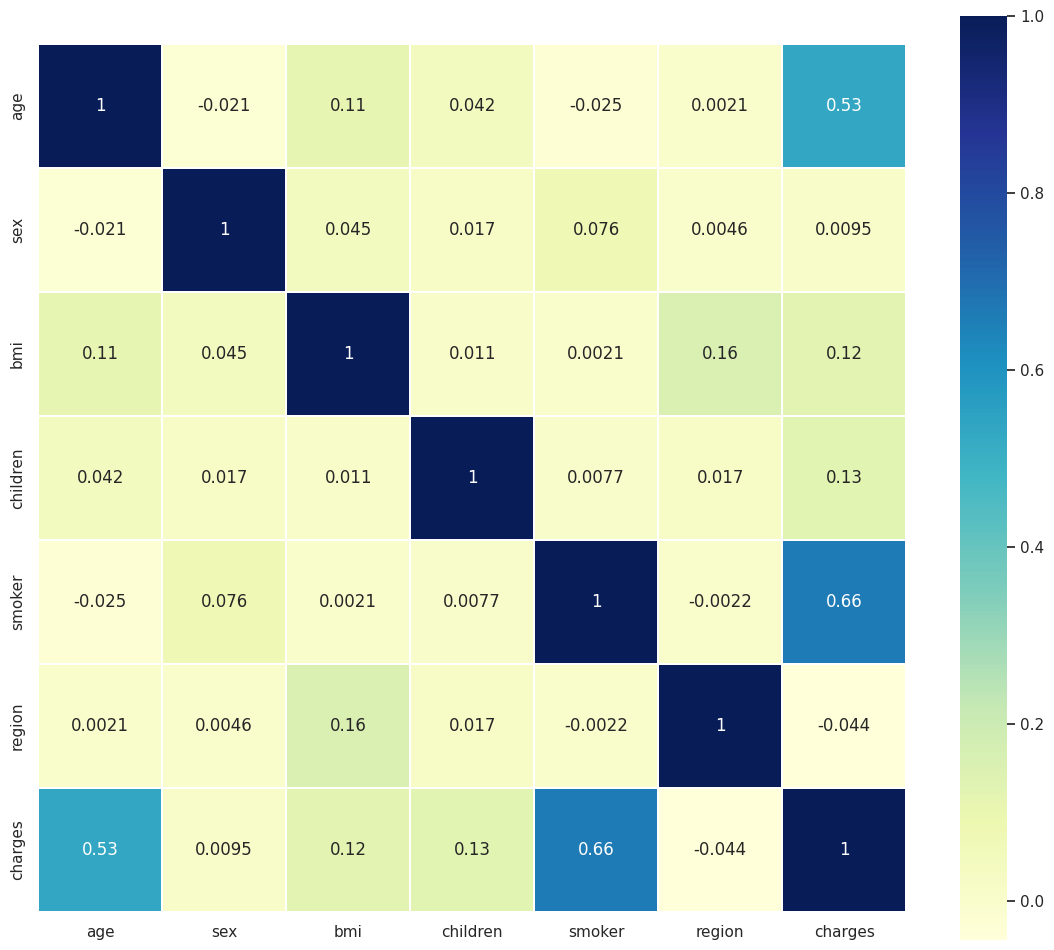

In [80]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(st.astype(float).corr(),
            linewidths=0.2,
            square=True,
            linecolor='white',
            annot=True,
            cmap="YlGnBu")
plt.show()

Parece que idade e tabagismo pesam mais quando olhamos para a linha de cobranças (ou coluna). Esperamos que os pesos desses dois sejam maiores do que os demais.

# Visualização de Dados

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


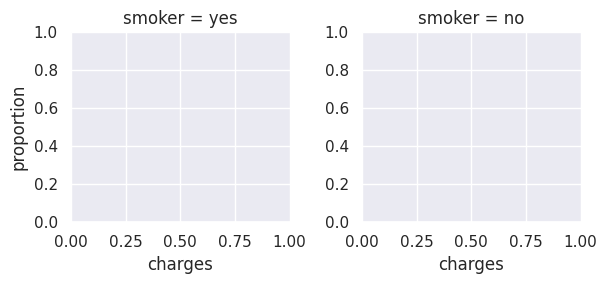

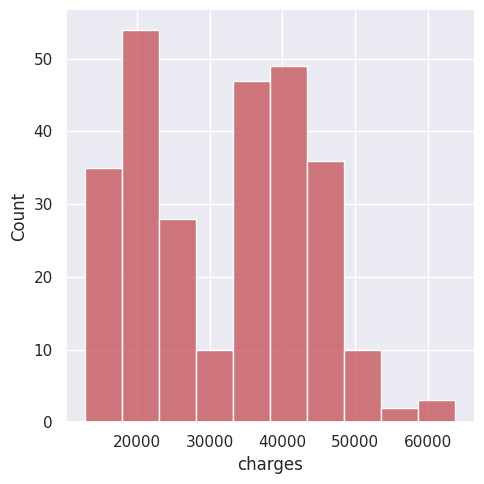

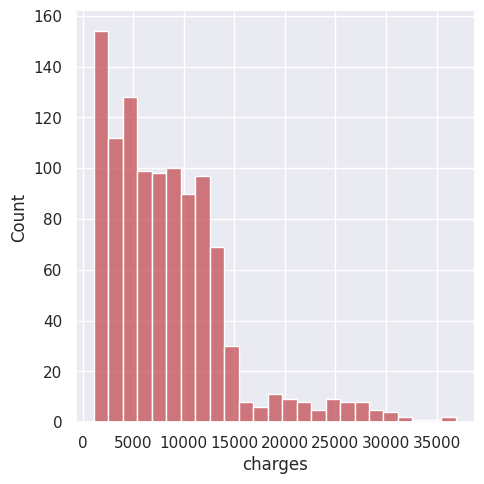

In [81]:
g = sns.FacetGrid(df, col="smoker", sharey=False, sharex = True)
g.map(sns.displot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

Não é surpresa que fumantes paguem mais por assistência médica.

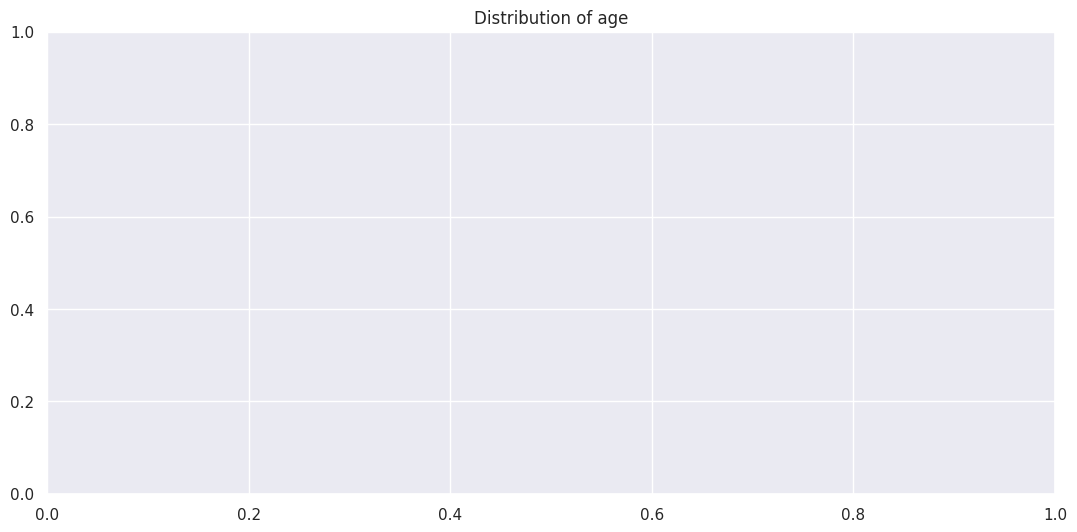

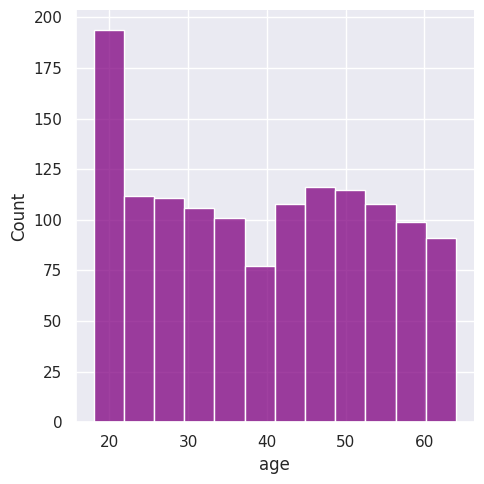

In [82]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.displot(df["age"], color = 'purple')

A julgar pela vida de festa na UVa, podemos ver por que tantos jovens adultos procuram atendimento médico.

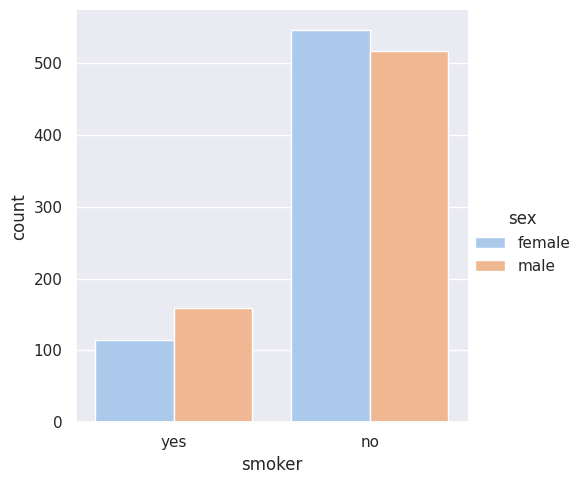

In [83]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data = df , palette='pastel');
plt.show()

Felizmente, a maioria entende as desvantagens de fumar.

Os dados parecem bem equilibrados com uma ligeira inclinação para o sexo masculino.

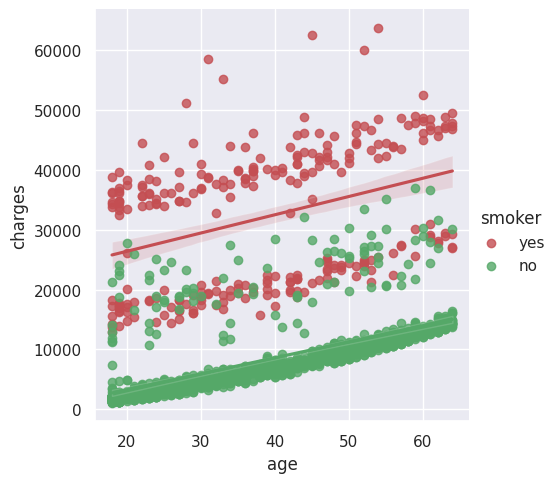

In [84]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette=dict(yes="r", no="g"));
plt.show()

Embora pareça óbvio que as cobranças aumentam linearmente com a idade, fumar parece ser o maior contribuinte para as cobranças.

In [85]:
df['age'] = df['age'].astype(float)
df['children'] = df['children'].astype(float)

df = pd.get_dummies(df)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,True,False,False,True,False,False,False,True
1,18.0,33.770,1.0,1725.55230,False,True,True,False,False,False,True,False
2,28.0,33.000,3.0,4449.46200,False,True,True,False,False,False,True,False
3,33.0,22.705,0.0,21984.47061,False,True,True,False,False,True,False,False
4,32.0,28.880,0.0,3866.85520,False,True,True,False,False,True,False,False


# Aplicação Prática - Aprendizagem de Máquina - Regressão

Embora pareça óbvio que as cobranças aumentam linearmente com a idade, fumar parece ser o maior contribuinte para as cobranças.

O primeiro passo é aplicar get dummies que funciona assim:

O `pandas.get_dummies` converte os vetores de características categóricas em uma multiplicação de vetor-matriz com uma matriz booleana de uns e zeros. Isso será mais útil, pois nosso regressor tratará as entradas como números em vez de inteiros.

Aqui está um exemplo de como funciona:

$\vec{b}=\beta \vec{x}$

Observe como a matriz de dummies é representada para a característica categórica do fumante:

$$\begin{pmatrix}\text{smoker_yes}\\ \text{smoker_no}\\ \text{smoker_no}\\ \vdots  \end{pmatrix}=\begin{bmatrix}
    1 & 0 \\
    0 & 1\\
    0 & 1\\
    \vdots & \vdots \\
    \end{bmatrix} \;
    \begin{pmatrix}\text{smoker_yes} \\  \text{smoker_no} \\ \end{pmatrix}$$

In [86]:
df['age'] = df['age'].astype(float)
df['children'] = df['children'].astype(float)

df = pd.get_dummies(df)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,True,False,False,True,False,False,False,True
1,18.0,33.770,1.0,1725.55230,False,True,True,False,False,False,True,False
2,28.0,33.000,3.0,4449.46200,False,True,True,False,False,False,True,False
3,33.0,22.705,0.0,21984.47061,False,True,True,False,False,True,False,False
4,32.0,28.880,0.0,3866.85520,False,True,True,False,False,True,False,False


In [87]:
y = df['charges']
X = df.drop(columns=['charges'])

Como nenhum dado de teste é fornecido, dividiremos o conjunto de dados fornecido em conjuntos de treinamento e teste.

In [88]:
from sklearn.model_selection import train_test_split


# vamos usar 20% do dataset como dados de teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

print('MSE dos dados de treinamento: {:.5}, MSE nos dados de teste: {:.5}'.format(lr_train_mse, lr_test_mse))

print('RMSE dos dados de treinamento: {:.5}, RMSE nos dados de teste: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)),
    np.sqrt(np.absolute(lr_train_mse))))

print('R2 nos dados de treino: {:.5}, R2 nos dados de teste: {:.5}'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

MSE dos dados de treinamento: 3.7278e+07, MSE nos dados de teste: 3.3597e+07
RMSE dos dados de treinamento: 6105.5, RMSE nos dados de teste: 6105.5
R2 nos dados de treino: 0.74173, R2 nos dados de teste: 0.78359


In [90]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LinearRegression(), X, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Acurácia: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2))

Acurácia: 0.74 (+/- 0.079)
